<a href="https://colab.research.google.com/github/lucasjirwin/Tree-Story-Cassini-Hackathon/blob/main/Carbon_Monoxide_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rasterio # install required package

In [1]:
from osgeo import gdal,osr
import numpy as np
import matplotlib.pyplot as plt
# Read in the Carbon Monoxide data from Creodias Satellite
ds = gdal.Open("carbon_monoxide.tif")
gt = ds.GetGeoTransform() # Check the coordinate system 
gt # 13.056... bottom left x-value, 23.699.. bottom left y-value 



(13.056204795837402,
 0.2988109588623047,
 0.0,
 23.699944496154785,
 0.0,
 -0.2062816619873047)

In [2]:
proj = ds.GetProjection() #Check the coordinate system - it's the correct Longitude and Latitude
proj

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]'

In [3]:
band = ds.GetRasterBand(1) # Extract the first band from the image 


In [4]:
array = band.ReadAsArray() # Store the image as an array

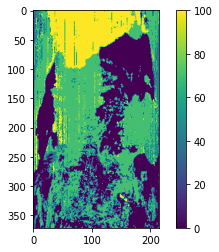

In [5]:
# Plot the image with the color gradient 
# Color indicates Carbon Monoxide Level
# We confirmed this by opening the file in the ESA SNAP general user interface 
# https://step.esa.int/main/download/snap-download/
plt.figure()
plt.imshow(array)
plt.colorbar()

In [6]:
# Calculate the number of pixels in the X direction
# And the number of pixels in the Y direction 
X_pixels = ds.RasterXSize
Y_pixels = ds.RasterYSize
print(X_pixels)
print(Y_pixels)

215
372


In [7]:
import rasterio as rio 

In [14]:
# Read in new file with correct Coordinate system 
ra = rio.open("carbon_monoxide_new.tif")
# Calculate the bounding box for this file 
bounds  = ra.bounds


In [15]:
bounds # Bounding box for sample tif file 

BoundingBox(left=13.056204795837402, bottom=-52.93269986447264, right=77.34377270931208, top=23.699944496154785)

In [17]:
# Function to convert latitude and longitude coordinates to the pixels in 
# the image
def convert2pixel(lat, lon):
  x_val = (int) (((lat - bounds[0])/ (bounds[2] - bounds[0])) * X_pixels)
  y_val = (int) (((lon - 0)/ (bounds[3] - 0)) * Y_pixels)
  return x_val, y_val


In [19]:
# Confirmed that the bottom left latitude and longitude coordinates
# corresponds to the first pixel in the image  
convert2pixel(13.056204795837402, 0) 


(0, 0)

In [20]:
# Function to check the Carbon Monoxide levels at the specific latitude and longitude! 
def COLevels(lat, lon): 
  x_val, y_val = convert2pixel(lat,lon)
  if array[x_val][y_val] > 75 :
     return "High CO levels"
  elif array[x_val][y_val] > 25:
     return "Medium CO levels"
  else: return "Low CO levels! The tree is doing its job!"

COLevels(19, 11.0293269986447264)

'Low CO levels! The tree is doing its job!'